In [1]:
import util

agg_df = util.load_agg_metrics(run_id="oct24", group=False)
agg_df.head()

,models,data,replications,test_mode,temperature,max_task_tokens,balanced_design,run,replication,accuracy,avg_vram_used,avg_duration_sec
10,RuterNorway/Llama-2-7b-chat-norwegian,B2C_lvl1_2024,10.0,constrained,0.0,250.0,1.0,99999.0,1.0,0.110000,2.890857,0.413708
11,RuterNorway/Llama-2-7b-chat-norwegian,B2C_lvl1_2024,10.0,constrained,0.0,250.0,1.0,99999.0,2.0,0.076667,2.890857,0.402007
12,RuterNorway/Llama-2-7b-chat-norwegian,B2C_lvl1_2024,10.0,constrained,0.0,250.0,1.0,99999.0,3.0,0.093333,2.890857,0.400514
13,RuterNorway/Llama-2-7b-chat-norwegian,B2C_lvl1_2024,10.0,constrained,0.0,250.0,1.0,99999.0,4.0,0.093333,2.890857,0.400732
14,RuterNorway/Llama-2-7b-chat-norwegian,B2C_lvl1_2024,10.0,constrained,0.0,250.0,1.0,99999.0,5.0,0.103333,2.890857,0.403296


In [2]:
for m in agg_df.models.unique():
    print(m)

RuterNorway/Llama-2-7b-chat-norwegian
RuterNorway/Llama-2-13b-chat-norwegian
norallm/normistral-7b-warm-instruct
norallm/normistral-7b-warm
norallm/normistral-7b-scratch
NorwAI/NorwAI-Mistral-7B-instruct
NorwAI/NorwAI-Mistral-7B
bineric/NorskGPT-Llama3-8b
bineric/NorskGPT-Mistral-7b
mistralai/Mistral-7B-v0.1
meta-llama/Meta-Llama-3.1-8B
meta-llama/Meta-Llama-3.1-8B-Instruct
google/gemma-2-2b-it
google/gemma-2-9b-it
google/gemma-2-27b-it
google/gemma-2-2b
google/gemma-2-9b
google/gemma-2-27b
meta-llama/Meta-Llama-3-8B
meta-llama/Meta-Llama-3-8B-Instruct
mistralai/Mistral-7B-Instruct-v0.1
meta-llama/Llama-2-7b-chat-hf
meta-llama/Llama-2-13b-chat-hf
nan


In [3]:
from consts import colors, model_to_color, model_map

owner_order = "Ruternorway Meta Mistralai Bineric Norwai Google Norallm".split()
owner_colors = {k.split("/")[0].split("-")[0].title():v for k, v in model_to_color.items()}
owner_colors = sorted(owner_colors.items(), key=lambda x: owner_order.index(x[0]))

owner_map = {
"Ruternorway": "Ruter",
"Meta": "Meta",
"Mistralai": "Mistral AI",
"Google": "Google",
"Bineric": "Bineric",
"Norwai": "NorwAI",
"Norallm": "NORA.LLM"
}

color_to_owner = {v:owner_map[k] for k, v in owner_colors}
# color_to_owner =
color_to_owner  

{'#d62728': 'Ruter',
 '#1f77b4': 'Meta',
 '#2ca02c': 'Mistral AI',
 '#8c564b': 'Bineric',
 '#9467bd': 'NorwAI',
 '#ff7f0e': 'Google',
 '#e377c2': 'NORA.LLM'}

instruct
['RuterNorway/Llama-2-7b-chat-norwegian', 'RuterNorway/Llama-2-13b-chat-norwegian', 'norallm/normistral-7b-warm-instruct', 'NorwAI/NorwAI-Mistral-7B-instruct', 'mistralai/Mistral-7B-Instruct-v0.1', 'bineric/NorskGPT-Llama3-8b', 'bineric/NorskGPT-Mistral-7b', 'meta-llama/Meta-Llama-3-8B-Instruct', 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'meta-llama/Llama-2-7b-chat-hf', 'meta-llama/Llama-2-13b-chat-hf', 'google/gemma-2-2b-it', 'google/gemma-2-9b-it', 'google/gemma-2-27b-it']
['Gemma2 27B IT', 'Gemma2 2B IT', 'Gemma2 9B IT', 'Llama2 13B Chat', 'Llama2 13B Chat-Nor', 'Llama2 7B Chat', 'Llama2 7B Chat-Nor', 'Llama3 8B IT', 'Llama3.1 8B IT', 'Mistral 7B v0.1 IT', 'Normistral 7B Warm IT', 'NorskGPT Llama 3 8B', 'NorskGPT Mistral 7B', 'NorwAI Mistral 7B IT']
base
['norallm/normistral-7b-warm', 'norallm/normistral-7b-scratch', 'NorwAI/NorwAI-Mistral-7B', 'mistralai/Mistral-7B-v0.1', 'meta-llama/Meta-Llama-3-8B', 'meta-llama/Meta-Llama-3.1-8B', 'google/gemma-2-2b', 'google/gemma-2-9b',

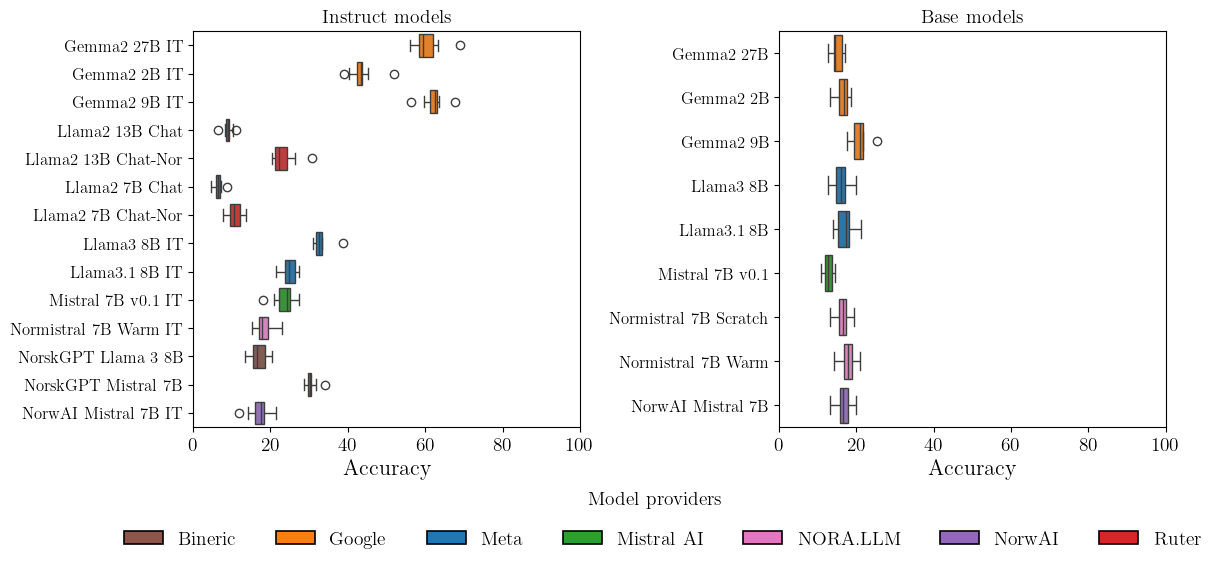

In [9]:
from IPython.display import display
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pgf import FigureCanvasPgf

# matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use("pgf")
plt.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",  # Use pdflatex for rendering
        "text.usetex": True,  # Enable LaTeX text rendering
        "font.family": "serif",  # Use a serif font, default in LaTeX
        "pgf.rcfonts": False,  # Disable rc settings for font types to use LaTeX defaults
    }
)

model_categories = {
    "instruct": [
        "RuterNorway/Llama-2-7b-chat-norwegian",
        "RuterNorway/Llama-2-13b-chat-norwegian",
        "norallm/normistral-7b-warm-instruct",
        "NorwAI/NorwAI-Mistral-7B-instruct",
        "mistralai/Mistral-7B-Instruct-v0.1",
        "bineric/NorskGPT-Llama3-8b",
        "bineric/NorskGPT-Mistral-7b",
        "meta-llama/Meta-Llama-3-8B-Instruct",
        "meta-llama/Meta-Llama-3.1-8B-Instruct",
        "meta-llama/Llama-2-7b-chat-hf", 
        "meta-llama/Llama-2-13b-chat-hf",
        "google/gemma-2-2b-it",
        "google/gemma-2-9b-it",
        "google/gemma-2-27b-it",
    ],
    "base": [
        "norallm/normistral-7b-warm",
        "norallm/normistral-7b-scratch",
        "NorwAI/NorwAI-Mistral-7B",
        "mistralai/Mistral-7B-v0.1",
        "meta-llama/Meta-Llama-3-8B",
        "meta-llama/Meta-Llama-3.1-8B",
        "google/gemma-2-2b",
        "google/gemma-2-9b",
        "google/gemma-2-27b",
    ],
}
model_legends = {
    "base": ["Norallm", "Norwai", "Mistralai", "Meta", "Google"],
    "instruct": ["Ruternorway", "Norallm", "Norwai", "Bineric", "Meta", "Google"],
}

fig_height = [4, 5]
legend_n = [5, 4]
legend_offset_y = [-0.35, -0.35]

prompt_type = "full_description"
plt.figure(figsize=(12, 5))
for i, model_cat in enumerate(model_categories):
    print(model_cat)
    model_selection = model_categories[model_cat]
    print(model_selection)
    # model_selection = sorted(model_selection, key=lambda x: x.split("/")[-1])

    filtered_agg_metrics = agg_df[agg_df["models"].isin(model_selection)]
    filtered_models = filtered_agg_metrics["models"].unique()
    palette = {model: model_to_color[model] for model in filtered_models}
    # prompt_types = ["full_description", "instruction_w_keywords"]
    plt.subplot(1, 2, i + 1)
    df = filtered_agg_metrics.copy()
    df = df.sort_values(
        by="models",
        key=lambda x: x.map(
            {model: model_map[model] for model in df["models"].unique()}
        ),
    )
    pretty_name = [model_map[model] for model in df["models"].unique()]
    print(pretty_name)

    sns.boxplot(x="accuracy", y="models", hue="models", data=df, palette=palette)
    plt.ylabel("")
    plt.xlabel("Accuracy", fontsize=16)
    plt.yticks(range(len(model_selection)), pretty_name, fontsize=12)
    plt.xlim(0, 1)
    plt.xticks(fontsize=14)
    # overwrite x-ticks as 0, 20, 40, 60, 80, 100
    plt.xticks(np.linspace(0, 1, 6), [f"{int(i*100)}%" for i in np.linspace(0, 1, 6)])
    plt.title(
        # f"{model_cat}: {prompt_type.replace('_', ' ').capitalize()}", fontsize=14
        f"{model_cat.title()} models", fontsize=14
    )

all_models = agg_df["models"].unique()
missing_models = [model for model in all_models if model not in model_to_color]
print("Missing models:", missing_models)

legend_colors = list(
    set(
        [
            (color_to_owner[model_to_color[model]], model_to_color[model])
            for model in all_models if model in model_to_color
        ]
    )
)

legend_colors = sorted(legend_colors, key=lambda x: x[0])
legend_patches = []
for label, color in legend_colors:
    legend_patches.append(
        mpatches.Patch(facecolor=color, edgecolor="black", linewidth=1.2, label=label)
    )

    # if row != 0:
plt.tight_layout()
plt.legend(
    handles=legend_patches,
    loc="lower center",
    ncol=7,
    bbox_to_anchor=(-0.3, -0.35),
    fontsize=14,
    frameon=False,
)
# legend description below legend box:
description = "Model providers"

plt.figtext(
    0.55,
    -0.02,
    description,
    wrap=True,
    horizontalalignment="center",
    fontsize=14,
)

plt.savefig(f"FIGURES/instruct-vs-base.pgf", dpi=200, bbox_inches="tight")
os.rename(f"FIGURES/instruct-vs-base.pgf", f"FIGURES/instruct-vs-base.tex")